<a href="https://colab.research.google.com/github/TFitzgerald1/AI-Rent-Predictions/blob/main/DeepLearningProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Importing the created CSV datasets
from google.colab import drive
drive.mount('/content/drive')

db_2023 = "/content/drive/MyDrive/databases/db_2023.csv"
db_2022 = "/content/drive/MyDrive/databases/db_2022.csv"
db_2021 = "/content/drive/MyDrive/databases/db_2021.csv"
db_2020 = "/content/drive/MyDrive/databases/db_2020.csv"
db_2019 = "/content/drive/MyDrive/databases/db_2019.csv"
db_2018 = "/content/drive/MyDrive/databases/db_2018.csv"
db_2017 = "/content/drive/MyDrive/databases/db_2017.csv"
db_2016 = "/content/drive/MyDrive/databases/db_2016.csv"


# Function for later use when compiling dataset into graphs
# Function returns a list of rent prices for a given apartment type
def get_apartmentType_data(apartment_type):
    #2016
    df = pd.read_csv(db_2016)
    rents_2016 = df[["year",apartment_type]]
    rents_2016.rename(columns={apartment_type:"rent"}, inplace = True)
    #2017
    df = pd.read_csv(db_2017)
    rents_2017 = df[["year",apartment_type]]
    print(rents_2017.min())
    rents_2017.rename(columns={apartment_type:"rent"}, inplace = True)
    #2018
    df = pd.read_csv(db_2018)
    rents_2018 = df[["year",apartment_type]]
    rents_2018.rename(columns={apartment_type:"rent"}, inplace = True)
    #2019
    df = pd.read_csv(db_2019)
    rents_2019 = df[["year",apartment_type]]
    rents_2019.rename(columns={apartment_type:"rent"}, inplace = True)
    #2020
    df = pd.read_csv(db_2020)
    rents_2020 = df[["year",apartment_type]]
    rents_2020.rename(columns={apartment_type:"rent"}, inplace = True)
    #2021
    df = pd.read_csv(db_2021)
    rents_2021 = df[["year",apartment_type]]
    rents_2021.rename(columns={apartment_type:"rent"}, inplace = True)
    #2022
    df = pd.read_csv(db_2022)
    rents_2022 = df[["year",apartment_type]]
    rents_2022.rename(columns={apartment_type:"rent"}, inplace = True)
    plot_rents = pd.concat([rents_2016, rents_2017, rents_2018,
                            rents_2019, rents_2020, rents_2021, rents_2022])

    return plot_rents

def returnDF(file1, file2):

    # Creates the base template for the dataframes and populates them
    df = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    X_DF = []
    Y_DF = []

    X_studio = df[["year","county","studio"]]
    X_studio.rename(columns={"studio":"rent"}, inplace = True)
    X_studio.insert(2, "apartment-type", 0)
    X_DF.append(X_studio)
    Y_studio = df2[["studio"]]
    Y_studio.rename(columns={"studio":"new-rent"}, inplace = True)
    Y_DF.append(Y_studio)

    X_1bed = df[["year","county","1-bedroom"]]
    X_1bed.rename(columns={"1-bedroom":"rent"}, inplace = True)
    X_1bed.insert(2, "apartment-type", 1)
    X_DF.append(X_1bed)
    Y_1bed = df2[["1-bedroom"]]
    Y_1bed.rename(columns={"1-bedroom":"new-rent"}, inplace = True)
    Y_DF.append(Y_1bed)

    X_2bed = df[["year","county","2-bedroom"]]
    X_2bed.rename(columns={"2-bedroom":"rent"}, inplace = True)
    X_2bed.insert(2, "apartment-type", 2)
    X_DF.append(X_2bed)
    Y_2bed = df2[["2-bedroom"]]
    Y_2bed.rename(columns={"2-bedroom":"new-rent"}, inplace = True)
    Y_DF.append(Y_2bed)

    X_3bed = df[["year","county","3-bedroom"]]
    X_3bed.rename(columns={"3-bedroom":"rent"}, inplace = True)
    X_3bed.insert(2, "apartment-type", 3)
    X_DF.append(X_3bed)
    Y_3bed = df2[["3-bedroom"]]
    Y_3bed.rename(columns={"3-bedroom":"new-rent"}, inplace = True)
    Y_DF.append(Y_3bed)

    X_4bed = df[["year","county","4-bedroom"]]
    X_4bed.rename(columns={"4-bedroom":"rent"}, inplace = True)
    X_4bed.insert(2, "apartment-type", 4)
    X_DF.append(X_4bed)
    Y_4bed = df2[["4-bedroom"]]
    Y_4bed.rename(columns={"4-bedroom":"new-rent"}, inplace = True)
    Y_DF.append(Y_4bed)

    X_DF = pd.concat([X_studio,X_1bed,X_2bed,X_3bed,X_4bed])
    Y_DF = pd.concat([Y_studio,Y_1bed,Y_2bed,Y_3bed,Y_4bed])
    # X_DF Format: entry#   year    county    apartment-type    rent
    # Y_DF Format: entry#   rent
    return X_DF, Y_DF

def get_data():
    # 2023 is the Final Prediction Data
    # Process copied from the returnDF function, excludes the Y_DF calculation

    df = pd.read_csv(db_2023)
    Final_Test = pd.DataFrame()
    # Studio
    X_studio = df[["year","county","studio"]]
    X_studio.rename(columns={"studio":"rent"}, inplace = True)
    X_studio.insert(2, "apartment-type", 0)
    Final_Test = pd.concat([Final_Test, X_studio])
    # 1-bed
    X_1bed = df[["year","county","1-bedroom"]]
    X_1bed.rename(columns={"1-bedroom":"rent"}, inplace = True)
    X_1bed.insert(2, "apartment-type", 1)
    Final_Test = pd.concat([Final_Test, X_1bed])
    # 2-bed
    X_2bed = df[["year","county","2-bedroom"]]
    X_2bed.rename(columns={"2-bedroom":"rent"}, inplace = True)
    X_2bed.insert(2, "apartment-type", 2)
    Final_Test = pd.concat([Final_Test, X_2bed])
    # 3-bed
    X_3bed = df[["year","county","3-bedroom"]]
    X_3bed.rename(columns={"3-bedroom":"rent"}, inplace = True)
    X_3bed.insert(2, "apartment-type", 3)
    Final_Test = pd.concat([Final_Test, X_3bed])
    # 4-bed
    X_4bed = df[["year","county","4-bedroom"]]
    X_4bed.rename(columns={"4-bedroom":"rent"}, inplace = True)
    X_4bed.insert(2, "apartment-type", 4)
    Final_Test = pd.concat([Final_Test, X_4bed])

#==============================================================================#
    # 2016 - 2022 Testing Data
    X_Training = pd.DataFrame()
    Y_Training = pd.DataFrame()


    # Creates two dataframes of the the rent prices for a year and the increase for the next year
    # 2016 data
    x, y = returnDF(db_2016, db_2017)
    X_Training = pd.concat([X_Training, x])
    Y_Training = pd.concat([Y_Training, y])
    # 2017 data
    x, y = returnDF(db_2017, db_2018)
    X_Training = pd.concat([X_Training, x])
    Y_Training = pd.concat([Y_Training, y])
    # 2018 data
    x, y = returnDF(db_2018, db_2019)
    X_Training = pd.concat([X_Training, x])
    Y_Training = pd.concat([Y_Training, y])
    # 2019 data
    x, y = returnDF(db_2019, db_2020)
    X_Training = pd.concat([X_Training, x])
    Y_Training = pd.concat([Y_Training, y])
    # 2020 data
    x, y = returnDF(db_2020, db_2021)
    X_Training = pd.concat([X_Training, x])
    Y_Training = pd.concat([Y_Training, y])
    # 2021 data
    x, y = returnDF(db_2021, db_2022)
    X_Training = pd.concat([X_Training, x])
    Y_Training = pd.concat([Y_Training, y])
    # 2022 data
    x, y = returnDF(db_2022, db_2023)
    X_Training = pd.concat([X_Training, x])
    Y_Training = pd.concat([Y_Training, y])
    X_train, X_test, Y_train, Y_test = train_test_split(X_Training, Y_Training, test_size=0.25, random_state=42)
    return X_train, X_test, Y_train, Y_test, Final_Test


X_Train, X_Test, Y_Train, Y_Test, Final_Test = get_data()

Mounted at /content/drive


<ipython-input-2-f9ddb58787e1>:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_studio.rename(columns={"studio":"rent"}, inplace = True)
<ipython-input-2-f9ddb58787e1>:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_1bed.rename(columns={"1-bedroom":"rent"}, inplace = True)
<ipython-input-2-f9ddb58787e1>:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_2bed.rename(columns={"2-bedroom":"rent"}, inplace = True)
<ipython-input

<ipython-input-30-7ae78808aacb>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rents_2016.rename(columns={apartment_type:"rent"}, inplace = True)
<ipython-input-30-7ae78808aacb>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rents_2017.rename(columns={apartment_type:"rent"}, inplace = True)
<ipython-input-30-7ae78808aacb>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rents_2018.rename(columns={apartment_type:"rent"}, inplace 

year         2017
4-bedroom     822
dtype: int64


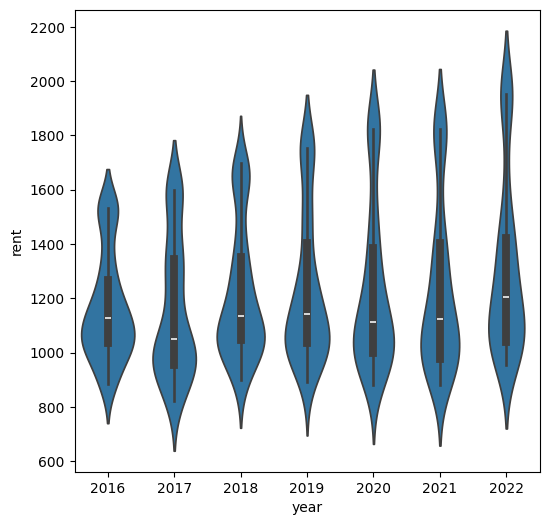

In [ ]:
# Printing a plot of the dataset distribution
import seaborn as sns

studioTemp = get_apartmentType_data("4-bedroom")
plt.figure(figsize=(6,6))
sns.violinplot(x = "year", y = "rent", data = studioTemp)
plt.title = "Studio Apartment Rent Distribution"
plt.show()

In [ ]:
# Building the MultiLayered Perceptron
model = Sequential()
model.add(keras.layers.Dense(4, kernel_initializer = "normal", activation = "relu", input_dim = 4))
model.add(keras.layers.Dense(3, kernel_initializer = "normal", activation = "relu"))
model.add(keras.layers.Normalization())
model.add(keras.layers.Dense(3, kernel_initializer = "normal", activation = "relu"))
model.add(keras.layers.Normalization())
model.add(keras.layers.Dense(1, kernel_initializer = "normal", activation = "linear"))
model.compile(optimizer = 'adam',
              loss=keras.losses.MeanAbsoluteError(),
              metrics = ["mean_absolute_error","mean_absolute_percentage_error"],
              )
perceptronStart = time.time()
history1 = model.fit(X_Train, Y_Train, batch_size = 32, epochs = 100,
                     validation_data = (X_Test,Y_Test))
perceptronEnd = time.time()
percTime = perceptronEnd - perceptronStart

Epoch 1/100
131/131 [==============================] - 2s 6ms/step - loss: 884.3160 - mean_absolute_error: 884.3160 - mean_absolute_percentage_error: 99.4706 - val_loss: 871.1658 - val_mean_absolute_error: 871.1658 - val_mean_absolute_percentage_error: 97.1185
Epoch 2/100
131/131 [==============================] - 0s 3ms/step - loss: 700.5475 - mean_absolute_error: 700.5475 - mean_absolute_percentage_error: 76.8703 - val_loss: 353.9138 - val_mean_absolute_error: 353.9138 - val_mean_absolute_percentage_error: 33.6247
Epoch 3/100
131/131 [==============================] - 1s 4ms/step - loss: 201.8525 - mean_absolute_error: 201.8525 - mean_absolute_percentage_error: 23.0895 - val_loss: 189.9887 - val_mean_absolute_error: 189.9887 - val_mean_absolute_percentage_error: 22.4065
Epoch 4/100
131/131 [==============================] - 0s 3ms/step - loss: 176.2914 - mean_absolute_error: 176.2914 - mean_absolute_percentage_error: 21.4260 - val_loss: 178.5923 - val_mean_absolute_error: 178.5923 - 

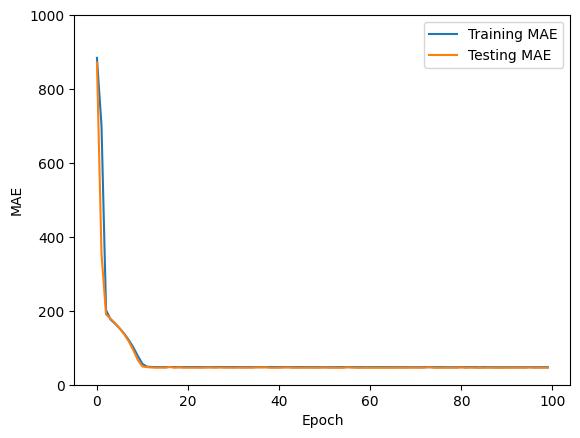

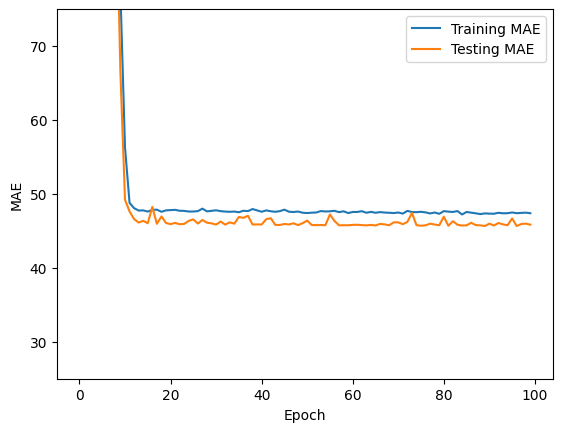

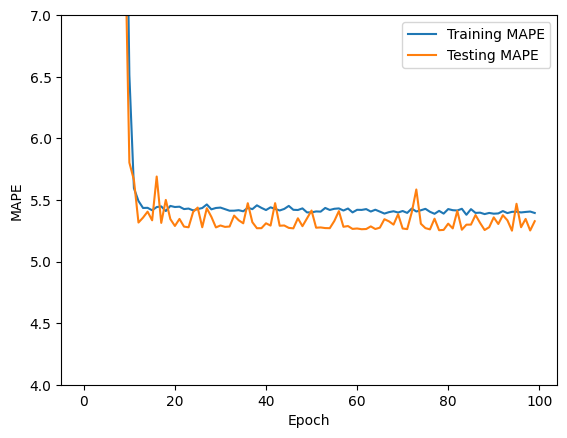

In [ ]:
# printing the change in MAE

# Zoomed out
plt.figure(0)
plt.plot(history1.history['mean_absolute_error'], label='Training MAE')
plt.plot(history1.history['val_mean_absolute_error'], label='Testing MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.ylim([0, 1000])
plt.legend(loc='upper right')
# Zoomed in
plt.figure(1)
plt.plot(history1.history['mean_absolute_error'], label='Training MAE')
plt.plot(history1.history['val_mean_absolute_error'], label='Testing MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.ylim([25, 75])
plt.legend(loc='upper right')

# Zoomed in further
plt.figure(2)
plt.plot(history1.history['mean_absolute_percentage_error'], label='Training MAPE')
plt.plot(history1.history['val_mean_absolute_percentage_error'], label='Testing MAPE')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.ylim([4, 7])
plt.legend(loc='upper right')

In [ ]:
# Export prediction values for use in paper
from pathlib import Path

filepath = Path('/content/drive/MyDrive/databases/out.csv')

filepath.parent.mkdir(parents=True, exist_ok=True)

Final_Test.to_csv(filepath)

In [ ]:
# Utilizing an LSTM Model
# Need to build the dataset differently to track the history of prices


def returnLSTMdf(file1, file2, file3):
  Xdf = pd.DataFrame()
  Xdf = pd.concat([Xdf, file1["new-rent"].rename("1-prior")], axis=1)
  Xdf = pd.concat([Xdf, file2["new-rent"].rename("2-prior")], axis=1)
  Xdf = pd.concat([Xdf, file3["new-rent"].rename("3-prior")], axis=1)
  return Xdf

df = pd.read_csv(db_2022)

_, rent_2016 = returnDF(db_2016, db_2016)
_, rent_2017 = returnDF(db_2016, db_2017)
_, rent_2018 = returnDF(db_2017, db_2018)

# 2019
_, rent_2019 = returnDF(db_2018, db_2019)
LSTM_2019 = returnLSTMdf(rent_2018,rent_2017,rent_2016)

# 2020
_, rent_2020 = returnDF(db_2019, db_2020)
LSTM_2020 = returnLSTMdf(rent_2019,rent_2018,rent_2017)

# 2021
_, rent_2021 = returnDF(db_2020, db_2021)
LSTM_2021 = returnLSTMdf(rent_2020,rent_2019,rent_2018)

# 2022
_, rent_2022 = returnDF(db_2021, db_2022)
LSTM_2022 = returnLSTMdf(rent_2021,rent_2020,rent_2019)

# Concatting into training dataset
LSTM_TrainX = pd.concat([LSTM_2022, LSTM_2021, LSTM_2020, LSTM_2019])
LSTM_TrainY = pd.concat([rent_2022, rent_2021, rent_2020, rent_2019])
print(LSTM_TrainX.shape)
print(LSTM_TrainY.shape)
# train x, validate x, train y,  validate y
print(LSTM_TrainX.shape)
LSTM_TX, LSTM_VX, LSTM_TY, LSTM_VY = train_test_split(LSTM_TrainX, LSTM_TrainY, test_size=0.25, random_state=42)

print(LSTM_TX.shape,LSTM_VX.shape)
# Final test (2023)
_, rent_2023 = returnDF(db_2022, db_2023)
LSTM_Final_Test = returnLSTMdf(rent_2022,rent_2021,rent_2020)

<ipython-input-2-f9ddb58787e1>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_studio.rename(columns={"studio":"rent"}, inplace = True)
<ipython-input-2-f9ddb58787e1>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_studio.rename(columns={"studio":"new-rent"}, inplace = True)
<ipython-input-2-f9ddb58787e1>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_1bed.rename(columns={"1-bedroom":"rent"}, inplace = True)
<ipython-input

(3180, 3)
(3180, 1)
(3180, 3)
(2385, 3) (795, 3)


<ipython-input-2-f9ddb58787e1>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_4bed.rename(columns={"4-bedroom":"new-rent"}, inplace = True)
<ipython-input-2-f9ddb58787e1>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_studio.rename(columns={"studio":"rent"}, inplace = True)
<ipython-input-2-f9ddb58787e1>:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y_studio.rename(columns={"studio":"new-rent"}, inplace = True)
<ipython-

In [ ]:
# LSTM model
print (LSTM_TX.shape)
print(LSTM_TY.shape)
# Building an LSTM Model
model2 = Sequential()
model2.add(keras.layers.LSTM(50, activation = "relu", input_shape=(LSTM_TX.shape[1], 1), return_sequences=True))
model2.add(keras.layers.Normalization())
model2.add(keras.layers.LSTM(50, activation = "relu", input_shape=(LSTM_TX.shape[1], 1), return_sequences=True))
model2.add(keras.layers.Normalization())
model2.add(keras.layers.LSTM(50, activation = "relu", input_shape=(LSTM_TX.shape[1], 1), return_sequences=True))
model2.add(keras.layers.Normalization())
model2.add(keras.layers.LSTM(50, activation = "relu", input_shape=(LSTM_TX.shape[1], 1), return_sequences=True))
model2.add(keras.layers.Normalization())
model2.add(keras.layers.Dense(units=1, activation='linear'))

# Compile the model
model2.compile(loss=keras.losses.MeanAbsoluteError(),
               optimizer=keras.optimizers.Adam(),
               metrics=['mean_absolute_error', 'mean_absolute_percentage_error'])

model2.summary()
# Train the model
LSTMStart = time.time()
history2 = model2.fit(LSTM_TX, LSTM_TY, epochs=100, batch_size=32,
          validation_data=(LSTM_VX, LSTM_VY))
LSTMEnd = time.time()
LSTMTime = LSTMEnd - LSTMStart

(2385, 3)
(2385, 1)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 3, 50)             10400     
                                                                 
 normalization_16 (Normaliz  (None, 3, 50)             101       
 ation)                                                          
                                                                 
 lstm_9 (LSTM)               (None, 3, 50)             20200     
                                                                 
 normalization_17 (Normaliz  (None, 3, 50)             101       
 ation)                                                          
                                                                 
 lstm_10 (LSTM)              (None, 3, 50)             20200     
                                                                 
 normalization_18 (Normaliz  (None

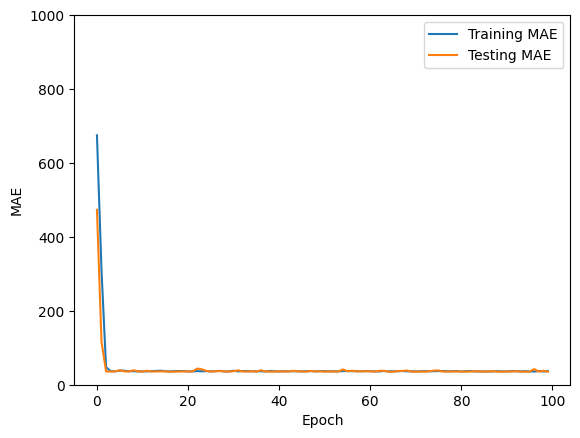

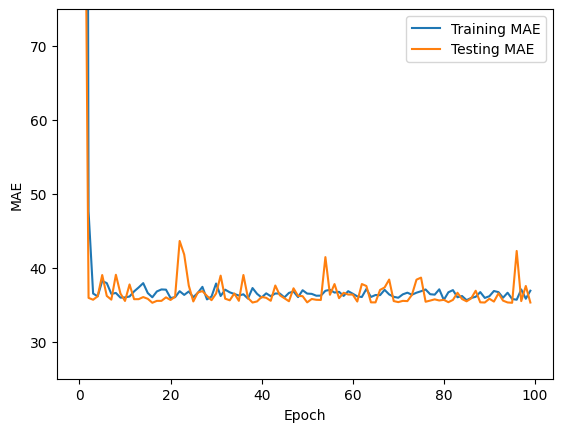

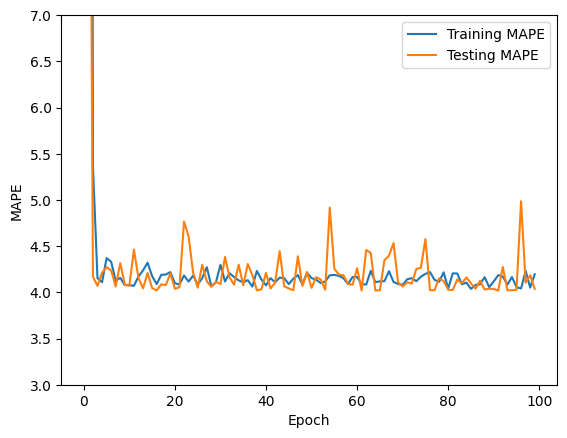

In [ ]:
# printing the change in MAE

# Zoomed out
plt.figure(3)
plt.plot(history2.history['mean_absolute_error'], label='Training MAE')
plt.plot(history2.history['val_mean_absolute_error'], label='Testing MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.ylim([0, 1000])
plt.legend(loc='upper right')
# Zoomed in
plt.figure(4)
plt.plot(history2.history['mean_absolute_error'], label='Training MAE')
plt.plot(history2.history['val_mean_absolute_error'], label='Testing MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.ylim([25, 75])
plt.legend(loc='upper right')

# Zoomed in
plt.figure(5)
plt.plot(history2.history['mean_absolute_percentage_error'], label='Training MAPE')
plt.plot(history2.history['val_mean_absolute_percentage_error'], label='Testing MAPE')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.ylim([3, 7])
plt.legend(loc='upper right')

Perceptron took 82.99387550354004 seconds
LSTM took 129.21863675117493 seconds


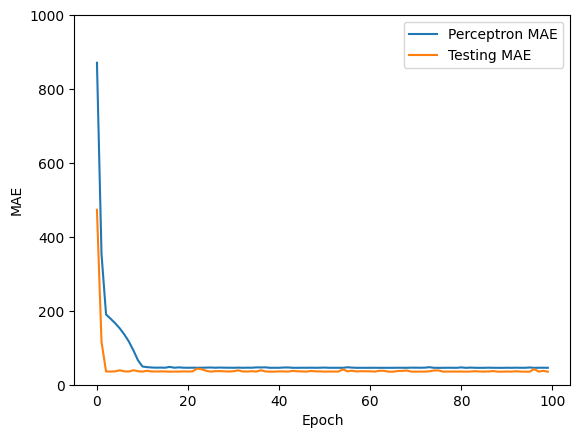

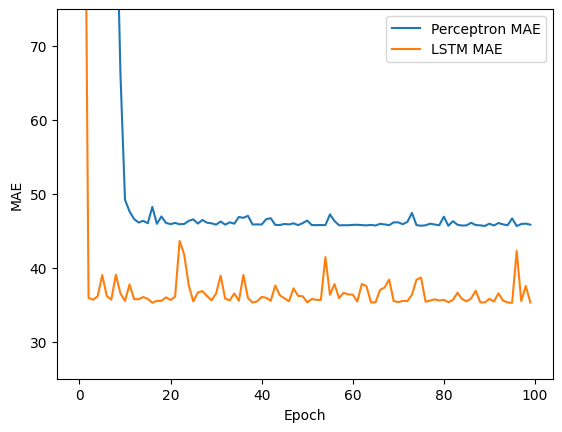

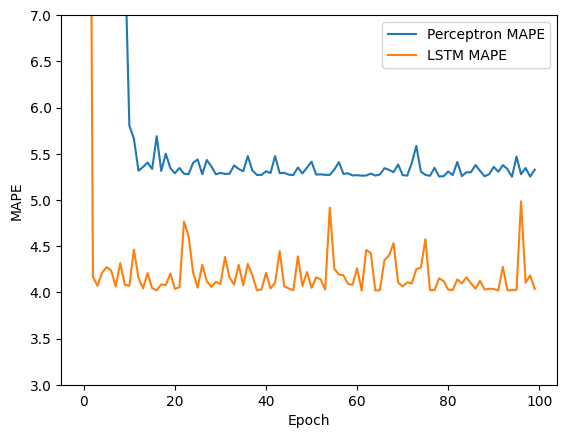

In [ ]:
# Comparison of Results

print("Perceptron took",percTime,"seconds")
print("LSTM took",LSTMTime,"seconds")
# Zoomed out
plt.figure(6)
plt.plot(history1.history['val_mean_absolute_error'], label='Perceptron MAE')
plt.plot(history2.history['val_mean_absolute_error'], label='Testing MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.ylim([0, 1000])
plt.legend(loc='upper right')
# Zoomed in
plt.figure(7)
plt.plot(history1.history['val_mean_absolute_error'], label='Perceptron MAE')
plt.plot(history2.history['val_mean_absolute_error'], label='LSTM MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.ylim([25, 75])
plt.legend(loc='upper right')

# Zoomed in
plt.figure(8)
plt.plot(history1.history['val_mean_absolute_percentage_error'], label='Perceptron MAPE')
plt.plot(history2.history['val_mean_absolute_percentage_error'], label='LSTM MAPE')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.ylim([3, 7])
plt.legend(loc='upper right')